In [1]:
globals().clear
import time
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from datetime import datetime
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 500

In [2]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Load dataset
#path = '/content/drive/MyDrive/CapstoneProject/code/02. Machine Learning/data/'
df = pd.read_excel('merged_onehot_test.xlsx')
df.shape

(13564, 66)

In [4]:
t1=df
t1.index=t1['Date']
t1.drop(columns=t1.columns[0:2], 
        axis=1, 
        inplace=True)
t1.head()

,TSLA_close,TSLA_vol_4_ave,TSLA_vwap_4_ave,TSLA_trans_4_ave,nasx_close_-1,dow_close_-1,dow_volume_-1,inx_close_-1,inx_volume_-1,tenbond_close_-1,fivbond_close_-1,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,day_01,day_02,day_03,day_04,day_05,day_06,day_07,day_08,day_09,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Timeslot,week_label
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-01 10:30:00,176.600,6531560.00,174.371825,29927.25,9526.87,25436.04,16068213,3050.03,108060941,0.68,0.32,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1
2020-06-01 10:45:00,176.748,4872685.00,175.236475,22062.00,9535.28,25473.21,12068894,3052.49,89776363,0.68,0.31,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,1
2020-06-01 11:00:00,176.560,3717613.75,175.730850,17452.00,9532.38,25440.58,13973570,3050.69,94103383,0.68,0.31,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,1
2020-06-01 11:15:00,175.474,2821491.25,175.958200,13504.00,9521.55,25408.86,13146463,3047.05,101791629,0.68,0.31,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8,1
2020-06-01 11:30:00,175.400,2607445.00,176.151450,12176.75,9512.11,25393.88,14378695,3045.30,83256033,0.68,0.31,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9,1


In [5]:
t1.shape

(13564, 64)

In [6]:
train_df = t1.loc['2020-06-01 10:30:00':'2021-12-31 16:00:00']
test_df = t1.loc['2022-01-01 09:30:00':'2022-05-27 16:00:00']

In [7]:
import time

In [8]:
start = time.time()
predictions = list()
a=1
count_time=list()

for i in test_df['week_label'].unique():

    st = time.time()
    scale_X = MinMaxScaler()  

    test_subset = test_df[test_df['week_label']==i]
    print(train_df.index[0])
    print(train_df.index[-1])
    print(test_subset.index[0])
    print(test_subset.index[-1])
    train_stand = train_df.copy()
    test_stand = test_subset.copy()
  
    X_train, y_train = train_stand.iloc[:,2:65], train_stand.iloc[:,0]
    X_train = scale_X.fit_transform(X_train)
    rf = RandomForestRegressor(n_estimators = 100, max_depth = 100)
    rf.fit(X_train,y_train)
    X_test, y_test = test_stand.iloc[:,2:65], test_stand.iloc[:,0]
    X_test = scale_X.transform(X_test)     
    y_hat=rf.predict(X_test)
    predictions.append(y_hat)
    et = time.time()
    used_time=et-st
    count_time.append(used_time)
      
    train_df = train_df.append(test_df[test_df['week_label']==i])
    train_df=train_df.drop(train_df[train_df['week_label']==a].index)
    a+=1


    print(train_df.index[0])
    print(train_df.index[-1])
    print('Time taken:'+str(used_time))
    print('---------------------------')
    
end = time.time()
print("total used time"+str(end-start))

2020-06-01 10:30:00
2021-12-31 16:00:00
2022-01-03 09:30:00
2022-01-07 16:00:00
2020-06-08 09:30:00
2022-01-07 16:00:00
Time taken:16.153432846069336
---------------------------
2020-06-08 09:30:00
2022-01-07 16:00:00
2022-01-10 09:30:00
2022-01-14 16:00:00
2020-06-15 09:30:00
2022-01-14 16:00:00
Time taken:13.481998682022095
---------------------------
2020-06-15 09:30:00
2022-01-14 16:00:00
2022-01-18 09:30:00
2022-01-21 16:00:00
2020-06-22 09:30:00
2022-01-21 16:00:00
Time taken:12.469688892364502
---------------------------
2020-06-22 09:30:00
2022-01-21 16:00:00
2022-01-24 09:30:00
2022-01-28 16:00:00
2020-06-29 09:30:00
2022-01-28 16:00:00
Time taken:12.45408320426941
---------------------------
2020-06-29 09:30:00
2022-01-28 16:00:00
2022-01-31 09:30:00
2022-02-04 16:00:00
2020-07-06 09:30:00
2022-02-04 16:00:00
Time taken:17.150991678237915
---------------------------
2020-07-06 09:30:00
2022-02-04 16:00:00
2022-02-07 09:30:00
2022-02-11 16:00:00
2020-07-13 09:30:00
2022-02-11 

In [9]:
df_expe = pd.DataFrame(test_df.iloc[:,0])
pred_list= list()
for i in range(len(predictions)):
  pred_list=pred_list+predictions[i].tolist()

 
df_pred = pd.DataFrame(pred_list,index=test_df.index,columns= ['predict'])

df_Result = pd.concat([df_expe,df_pred],axis=1)

df_Result

,TSLA_close,predict
Date,,
2022-01-03 09:30:00,1165.1980,1057.308790
2022-01-03 09:45:00,1149.0000,1073.616020
2022-01-03 10:00:00,1156.5900,1100.424780
2022-01-03 10:15:00,1152.0050,1126.471630
2022-01-03 10:30:00,1153.2900,1142.569460
2022-01-03 10:45:00,1168.3000,1144.743470
2022-01-03 11:00:00,1169.3000,1145.194500
2022-01-03 11:15:00,1165.8360,1155.120100
2022-01-03 11:30:00,1163.5650,1155.570140


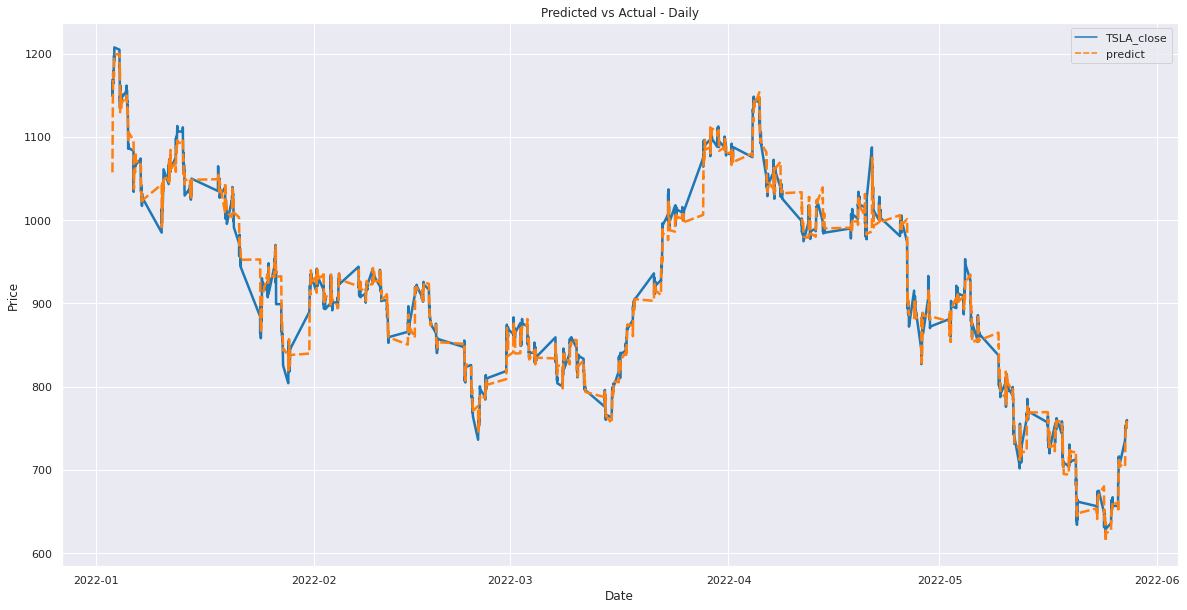

In [10]:
plt.figure(figsize=(20,10))
linep = sns.lineplot(data=df_Result, palette="tab10", linewidth=2.5)
linep.set(xlabel='Date', ylabel='Price', title='Predicted vs Actual - Daily')
plt.show()

In [11]:
#Ref: https://stackoverflow.com/questions/47648133/mape-calculation-in-python
#define function to calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
#Ref: https://stackoverflow.com/questions/47648133/mape-calculation-in-python
#define function to calculate the MPE
def mean_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true) * 100

In [13]:
mean_absolute_percentage_error(df_Result['TSLA_close'],df_Result['predict'])

1.0043270652772591

In [14]:
mean_percentage_error(df_Result['TSLA_close'],df_Result['predict'])

0.008006886583204484

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_Result['TSLA_close'],df_Result['predict'],squared=False)

12.708258652384588

In [16]:
np.mean(count_time)

13.222109124774025